In [1]:
from modules import forward_diffusion_sample
import torch
from modules import get_time_embedding
from modules import model_architecture
from modules import reverse_diffusion_sample

# Forward diffusion test

In [16]:
num_diffusion_steps = 1000
betas = torch.linspace(0.0001, 0.02, num_diffusion_steps)

batch_size =  4
dim = 10

x_0 = torch.randn(batch_size, dim)

In [17]:
betas.shape

torch.Size([1000])

In [18]:
x_0.shape

torch.Size([4, 10])

In [19]:
timestep = 50
timestep_tensor = torch.full((batch_size,), timestep, dtype=torch.long) # Tensor shaped (batch_size,) with timestep repeated batch_size times

In [20]:
timestep_tensor.shape

torch.Size([4])

In [21]:
x_t,noise = forward_diffusion_sample(x_0, timestep_tensor,betas)

In [22]:

print("Clean sample (x_0):")
print(x_0)
print("\nNoisy sample (x_t):")
print(x_t)
print("\nNoise added:")
print(noise)

Clean sample (x_0):
tensor([[ 1.4750, -0.3938, -0.4552, -1.6739,  0.8467,  1.0316,  0.9094, -0.4057,
         -0.9085, -0.4406],
        [ 0.8871,  1.2570, -0.2101, -1.3765,  0.6372,  0.5948, -1.3427,  2.4970,
          1.5104,  1.5017],
        [ 0.2432,  1.4318, -0.5506,  0.4336,  0.2242, -0.9029,  0.6744,  1.0569,
          1.0807,  1.3416],
        [ 0.1433,  0.9565, -0.8070,  0.1681, -0.4470,  0.6217,  1.5089,  0.6798,
          0.2231, -0.0413]])

Noisy sample (x_t):
tensor([[ 1.2194, -0.4151, -0.7382, -1.3455,  0.5508,  0.7636,  1.1034, -0.2733,
         -1.0079, -0.5609],
        [ 0.6060,  1.1153, -0.0248, -1.4095,  0.5671,  0.7894, -1.1267,  2.5681,
          1.2953,  1.4257],
        [ 0.2092,  1.3063, -0.6171,  0.4502,  0.4828, -0.9745,  0.6418,  1.2699,
          0.7880,  1.5301],
        [ 0.3794,  1.2219, -0.6230,  0.1375, -0.7460,  0.7359,  1.1333,  0.6272,
          0.1124, -0.1248]])

Noise added:
tensor([[-1.3452, -0.1572, -1.6727,  1.7481, -1.6329, -1.4560,  1.1982,

# Time embedding test

In [23]:
test = get_time_embedding(timestep_tensor, 32)

In [24]:
print(test)
print(test.shape)

tensor([[-0.2624,  0.1566, -0.1032,  0.5084, -0.9589,  0.3239,  0.9999,  0.7765,
          0.4794,  0.2775,  0.1575,  0.0888,  0.0500,  0.0281,  0.0158,  0.0089,
          0.9650, -0.9877, -0.9947, -0.8611,  0.2837, -0.9461, -0.0103,  0.6301,
          0.8776,  0.9607,  0.9875,  0.9960,  0.9988,  0.9996,  0.9999,  1.0000],
        [-0.2624,  0.1566, -0.1032,  0.5084, -0.9589,  0.3239,  0.9999,  0.7765,
          0.4794,  0.2775,  0.1575,  0.0888,  0.0500,  0.0281,  0.0158,  0.0089,
          0.9650, -0.9877, -0.9947, -0.8611,  0.2837, -0.9461, -0.0103,  0.6301,
          0.8776,  0.9607,  0.9875,  0.9960,  0.9988,  0.9996,  0.9999,  1.0000],
        [-0.2624,  0.1566, -0.1032,  0.5084, -0.9589,  0.3239,  0.9999,  0.7765,
          0.4794,  0.2775,  0.1575,  0.0888,  0.0500,  0.0281,  0.0158,  0.0089,
          0.9650, -0.9877, -0.9947, -0.8611,  0.2837, -0.9461, -0.0103,  0.6301,
          0.8776,  0.9607,  0.9875,  0.9960,  0.9988,  0.9996,  0.9999,  1.0000],
        [-0.2624,  0.1566

# Reverse diffusion process

In [25]:
x_t_minus_1 = reverse_diffusion_sample(x_t, betas, timestep_tensor, model_architecture)

x_T shape: torch.Size([4, 10])
time_embedding shape: torch.Size([4, 2])
x shape: torch.Size([4, 12])


In [15]:
print(f" Original sample (x_t): {x_t}")
print(f" Noise added: {noise}")
print(f" Reversed sample (x_t-1): {x_t_minus_1}")

 Original sample (x_t): tensor([[ 0.9129,  0.9456,  1.9236,  0.6603,  0.0957, -0.8940,  1.2359,  1.8455,
          2.4707, -0.1314],
        [ 0.4904,  0.2617, -0.1398, -0.3541,  0.0190,  0.6403,  1.2285,  0.5831,
          0.2228,  0.3880],
        [-0.7446, -0.3469, -1.2333,  0.9391, -1.0112,  1.4118,  0.7305,  0.3503,
         -0.8563,  0.0370],
        [ 1.6883,  1.1925, -0.6067, -0.5078, -0.9327, -0.2396,  1.2374, -0.2426,
         -0.5686, -0.3173]])
 Noise added: tensor([[-0.5921,  0.8497,  1.6738,  0.4271, -1.4904, -0.8752, -1.5927, -0.7021,
          0.9303,  0.0672],
        [-0.7069,  0.5148, -0.2175,  0.2886,  0.1850,  0.9603, -0.7536, -0.7710,
          1.1935,  1.2176],
        [ 1.0512, -1.2152,  1.1807,  0.4453, -0.5517,  1.9664,  0.4839, -0.1953,
          0.0798, -0.0605],
        [ 0.0398,  0.3673,  0.4900, -0.7888, -0.4366,  0.5434, -1.3997,  0.6173,
         -1.0215, -1.7815]])
 Reversed sample (x_t-1): tensor([[ 0.9119,  0.9473,  1.9252,  0.6607,  0.0961, -0.8930,

# Training of model

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from modules import run_reverse_diffusion

In [2]:
from dataset import ConditionalStockDataset

In [3]:
base_path = "../../price/raw"
df = pd.read_csv(f"{base_path}/AAPL.csv")
print(len(df))

1258


In [4]:
# 1. Daily Return (percentage change from open to close)
df['Return'] = (df['Close'] - df['Open']) / df['Open']

# 2. Price Difference (Close - Open)
df['Diff'] = df['Close'] - df['Open']

# 3. High-Low Difference (as a measure of volatility)
df['HL_Diff'] = df['High'] - df['Low']

# 4. 5-day Moving Average of the Close (shifted to avoid leakage)
df['MA5'] = df['Close'].rolling(window=5).mean().shift(1)

# 5. 5-day Moving Average of the Return (shifted)
df['Return_MA5'] = df['Return'].rolling(window=5).mean().shift(1)

# Drop rows with NaN values that result from rolling and shifting
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Return,Diff,HL_Diff,MA5,Return_MA5
0,2012-09-11,95.015717,95.728569,93.785713,94.370003,85.265068,125995800,-0.006796,-0.645714,1.942856,96.132857,-0.002394
1,2012-09-12,95.264282,95.699997,93.714287,95.684288,86.452538,178058300,0.004409,0.420006,1.985710,95.722000,-0.006519
2,2012-09-13,96.767143,97.928574,96.395714,97.568573,88.155037,149590000,0.008282,0.801430,1.532860,95.709428,-0.004057
3,2012-09-14,98.565712,99.568573,98.269997,98.754288,89.226341,150118500,0.001913,0.188576,1.298576,95.901143,-0.003321
4,2012-09-17,99.907143,99.971428,99.230003,99.968575,90.323479,99507800,0.000615,0.061432,0.741425,96.210858,-0.003644


In [6]:
feature_columns = ['Open', 'High', 'Low', 'Volume', 'Return', 'Diff', 'HL_Diff', 'MA5', 'Return_MA5']
# We keep the target as the raw 'Close' (normalized later)
target_column = 'Close'

filtered_df = df[feature_columns + [target_column]]

seq_len = 10

# Split into training and test data 
train_size = int(len(filtered_df) * 0.8)
train_data = filtered_df.iloc[:train_size].copy()
test_data = filtered_df.iloc[train_size:].copy()


In [7]:
train_data

,Open,High,Low,Volume,Return,Diff,HL_Diff,MA5,Return_MA5,Close
0,95.015717,95.728569,93.785713,125995800,-0.006796,-0.645714,1.942856,96.132857,-0.002394,94.370003
1,95.264282,95.699997,93.714287,178058300,0.004409,0.420006,1.985710,95.722000,-0.006519,95.684288
2,96.767143,97.928574,96.395714,149590000,0.008282,0.801430,1.532860,95.709428,-0.004057,97.568573
3,98.565712,99.568573,98.269997,150118500,0.001913,0.188576,1.298576,95.901143,-0.003321,98.754288
4,99.907143,99.971428,99.230003,99507800,0.000615,0.061432,0.741425,96.210858,-0.003644,99.968575
...,...,...,...,...,...,...,...,...,...,...
997,106.620003,107.440002,106.290001,24970300,0.001876,0.199997,1.150001,107.980000,-0.001699,106.820000
998,105.800003,106.500000,105.500000,24863900,0.001890,0.199997,1.000000,107.642000,-0.000681,106.000000
999,105.660004,106.570000,105.639999,29662400,0.004164,0.439994,0.930001,107.072000,-0.000781,106.099998
1000,106.139999,106.800003,105.620003,26701500,0.005559,0.590004,1.180000,106.686000,0.001046,106.730003


In [8]:
scaler = MinMaxScaler()
scaler.fit(train_data)

# Transform train and test sets.
train_data.loc[:, train_data.columns] = scaler.transform(train_data)
test_data.loc[:, test_data.columns] = scaler.transform(test_data)
print("Done")


Done


/tmp/ipykernel_564460/3772158868.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.32072709 0.46856191 0.38772434 ... 0.0471822  0.03877453 0.03906133]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_data.loc[:, train_data.columns] = scaler.transform(train_data)
/tmp/ipykernel_564460/3772158868.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.03928253  0.08325006  0.1134565   0.0951555   0.09156573  0.13950723
  0.27782951  0.21846813  0.1897979   0.09647874  0.06095948  0.06518731
  0.05119053  0.11197765  0.04776999  0.0328282   0.04712172  0.06485735
  0.0662547   0.02457757  0.04739346  0.02387137  0.04467458  0.03212115
  0.06584836  0.14480245  0.06968404  0.06288499  0.06419062  0.03003833
  0.03267515  0.01984344  0.03146067  0.02881107  0.02979356  0.0996193
  0.15074622  0.06

# With context window

In [9]:
from dataset import ConditionalStockDataset

In [10]:
context_len = 10
train_dataset = ConditionalStockDataset(train_data,context_len, feature_columns=feature_columns ,target_column=target_column)
test_dataset = ConditionalStockDataset(test_data, context_len, feature_columns=feature_columns ,target_column=target_column)
print("Datasets created successfully!")

Datasets created successfully!


In [11]:
#Visualize the first sample
sample = train_dataset[1]
print(sample)


(tensor([[0.5041, 0.4985, 0.5066, 0.4686, 0.4615, 0.4987, 0.0934, 0.5208, 0.4064],
        [0.5231, 0.5273, 0.5417, 0.3877, 0.4867, 0.5231, 0.0657, 0.5207, 0.4701],
        [0.5458, 0.5485, 0.5663, 0.3892, 0.4452, 0.4839, 0.0513, 0.5232, 0.4892],
        [0.5628, 0.5537, 0.5788, 0.2455, 0.4367, 0.4758, 0.0172, 0.5274, 0.4808],
        [0.5638, 0.5584, 0.5822, 0.2281, 0.4516, 0.4904, 0.0235, 0.5416, 0.6188],
        [0.5645, 0.5614, 0.5881, 0.1950, 0.4499, 0.4887, 0.0105, 0.5574, 0.6690],
        [0.5625, 0.5542, 0.5770, 0.2019, 0.4284, 0.4676, 0.0282, 0.5698, 0.6598],
        [0.5684, 0.5634, 0.5877, 0.3687, 0.4112, 0.4506, 0.0218, 0.5758, 0.6135],
        [0.5402, 0.5451, 0.5571, 0.4171, 0.4700, 0.5078, 0.0778, 0.5792, 0.5865],
        [0.5428, 0.5407, 0.5384, 0.3312, 0.2932, 0.3372, 0.1448, 0.5757, 0.6129]]), tensor(0.5082))


In [12]:
test_dataset[0]

(tensor([[0.6639, 0.6612, 0.6872, 0.0393, 0.4206, 0.4590, 0.0202, 0.6676, 0.6465],
         [0.6631, 0.6672, 0.6815, 0.0833, 0.4648, 0.5058, 0.0753, 0.6700, 0.6271],
         [0.6557, 0.6479, 0.6575, 0.1135, 0.3275, 0.3611, 0.0961, 0.6763, 0.6428],
         [0.6227, 0.6279, 0.6299, 0.0952, 0.3386, 0.3752, 0.1304, 0.6748, 0.5377],
         [0.5975, 0.6279, 0.6220, 0.0916, 0.6100, 0.6504, 0.1671, 0.6651, 0.4342],
         [0.6590, 0.6675, 0.6837, 0.1395, 0.4594, 0.5000, 0.0667, 0.6590, 0.5735],
         [0.6745, 0.7223, 0.7015, 0.2778, 0.6151, 0.6665, 0.2430, 0.6597, 0.6043],
         [0.7394, 0.7571, 0.7655, 0.2185, 0.5307, 0.5813, 0.1089, 0.6688, 0.7236],
         [0.7553, 0.7623, 0.7727, 0.1898, 0.4214, 0.4590, 0.0998, 0.6957, 0.8849],
         [0.7562, 0.7630, 0.7624, 0.0965, 0.3415, 0.3688, 0.1512, 0.7273, 0.9507]]),
 tensor(0.7483))

In [13]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, drop_last=True)


In [14]:
for context,x0 in train_loader :
    # print(x0)
    print(f"Context shape : {context.shape},\n x0 shape : {x0.shape}")
    break

Context shape : torch.Size([16, 10, 9]),
 x0 shape : torch.Size([16])


In [15]:
from modules import model_architecture
from modules import forward_diffusion_sample
from modules import reverse_diffusion_sample

import torch.nn.functional as F
from modules import ResidualMLP
from modules import Context_Encoder
from modules import cosine_beta_schedule
from modules import get_time_embedding
import torch

In [20]:
# Hyperparameters
num_diffusion_steps = 100  # Total diffusion steps
num_epochs = 200
batch_size = 16
learning_rate = 1e-4

# Create a beta schedule: linearly spaced between 0.0001 and 0.01
# betas = torch.linspace(0.0001, 0.01, num_diffusion_steps)
betas = cosine_beta_schedule(num_diffusion_steps, s=0.008)


# Since our targets are scalars, dim = 1
dim = 1
embedding_dim = 32  # As used in get_time_embedding
#hidden_size for context = context_embedding size
context_embedding_size = 32
# denoise_net = ResidualMLP(dim, embedding_dim, context_embedding_size=context_embedding_size, hidden_size=512)
denoise_net = ResidualMLP(dim=1, embedding_dim=32, context_embedding_size=32, hidden_size=512, num_chunks=8, attn_heads=4)
# Instantiate the context embedding network
#input size = num of features
input_size = 9
# Instantiate the denoising network
context_input_dim = 9
context_hidden_dim = 32
context_net = Context_Encoder(input_dim=context_input_dim, hidden_dim=context_hidden_dim, kernel_size=3, dilation_rates=[1,2,4], num_heads=4)
# Define the optimizer
optimizer = torch.optim.Adam(denoise_net.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)


for epoch in range(num_epochs):
    for context,x0 in train_loader:
        # Ensure x0 is shaped as [batch_size, dim]
        # If needed, reshape x0 (for instance, x0 = x0.unsqueeze(1) if x0 is 1D)
        # context is of shape [batch_size, context_len, num_features]
        
        # Sample a random diffusion timestep for each sample in the batch
        t = torch.randint(0, num_diffusion_steps, (batch_size,), dtype=torch.long)
        
        # Generate the noisy sample and the true noise using forward diffusion
        x_t, true_noise = forward_diffusion_sample(x0, t, betas)
        # print(f"x_t shape : {x_t.shape}")
        
        # Compute time embedding for the sampled timesteps
        time_embedding = get_time_embedding(t, embedding_dim)
        # print(f"time_embedding shape : {time_embedding.shape}")
        
        # Concatenate x_t with the time embedding to form the input to the denoising network
        x_combined = torch.cat([x_t, time_embedding], dim=-1)
        # x_combined shape is [batch_size, dim + embedding_dim]
        # print(f"x_combined shape : {x_combined.shape}")
        
        # Get context embedding
        context_embedding = context_net(context)
        # print(context_embedding.shape)

        x_combined = torch.cat([x_combined, context_embedding], dim=-1)
        # print(f"x_combined shape : {x_combined.shape}")
        
        # Predict the noise using the denoising network directly
        predicted_noise = denoise_net(x_combined)
        
        # Compute the loss between predicted noise and true noise
        loss = F.mse_loss(predicted_noise, true_noise)
        
        optimizer.zero_grad()
        loss.backward()
        # torch.nn.utils.clip_grad_norm_(denoise_net.parameters(), max_norm=1.0)
        optimizer.step()
    
    scheduler.step()
    current_lr = optimizer.param_groups[0]['lr']
    print(f"Epoch {epoch+1}, Loss: {loss.item()}, LR: {current_lr}")

Epoch 1, Loss: 0.3157801628112793, LR: 0.0001
Epoch 2, Loss: 0.15462623536586761, LR: 0.0001
Epoch 3, Loss: 0.1311703324317932, LR: 0.0001
Epoch 4, Loss: 0.2527357339859009, LR: 0.0001
Epoch 5, Loss: 0.06301648914813995, LR: 0.0001
Epoch 6, Loss: 0.2202163189649582, LR: 0.0001
Epoch 7, Loss: 0.7628412842750549, LR: 0.0001
Epoch 8, Loss: 0.15838199853897095, LR: 0.0001
Epoch 9, Loss: 0.10053954273462296, LR: 0.0001
Epoch 10, Loss: 0.05811390280723572, LR: 5e-05
Epoch 11, Loss: 0.18487133085727692, LR: 5e-05
Epoch 12, Loss: 0.053171977400779724, LR: 5e-05
Epoch 13, Loss: 0.3238200545310974, LR: 5e-05
Epoch 14, Loss: 0.08196522295475006, LR: 5e-05
Epoch 15, Loss: 0.08665934205055237, LR: 5e-05
Epoch 16, Loss: 0.45119982957839966, LR: 5e-05
Epoch 17, Loss: 0.654020369052887, LR: 5e-05
Epoch 18, Loss: 0.20985868573188782, LR: 5e-05
Epoch 19, Loss: 0.12989218533039093, LR: 5e-05
Epoch 20, Loss: 0.11236424744129181, LR: 2.5e-05
Epoch 21, Loss: 0.12216438353061676, LR: 2.5e-05
Epoch 22, Loss: 

In [17]:

denoise_net.eval()
context_net.eval()

# Define hyperparameters 
num_diffusion_steps = 100  
batch_size = 16            
dim = 1                    

# Run the reverse diffusion chain starting from noise
generated_samples = run_reverse_diffusion(denoise_net, context_net,context, betas, num_diffusion_steps, batch_size, dim,embedding_dim)

print("Generated samples (predicted clean x0):")
print(generated_samples)


timestep: 99


TypeError: reverse_diffusion_sample() takes 7 positional arguments but 9 were given

In [21]:
import torch
import torch.nn.functional as F

# Set the model to evaluation mode
denoise_net.eval()
context_net.eval()

# Lists to store losses, predictions, and ground truths
all_losses = []
all_predictions = []
all_ground_truths = []

# Loop over the test DataLoader
with torch.no_grad():
    for context,x0 in test_loader:
        # Ensure x0 is of shape [batch_size, dim]
        if x0.dim() == 1:
            x0 = x0.unsqueeze(1)
        batch_size = x0.shape[0]

        # Initialize x_T as pure Gaussian noise (same shape as x0)
        x_T = torch.randn(batch_size, dim)

        # Run the full reverse diffusion chain from t = num_diffusion_steps - 1 down to 0
        x_t = x_T
        for t_val in reversed(range(num_diffusion_steps)):
            # Create a timestep tensor for the current reverse step (shape: [batch_size])
            t_tensor = torch.full((batch_size,), t_val, dtype=torch.long)
            # Perform one reverse diffusion step
            # x_T, betas, timestep, embedding_dim, context, context_net, denoise_net
            x_t = reverse_diffusion_sample(x_t, betas, t_tensor, embedding_dim,context,context_net, denoise_net)
        
        # The final x_t is the predicted clean sample x0_pred
        x0_pred = x_t

        # Compute the MSE loss between the predicted clean sample and the ground truth x0
        loss = F.mse_loss(x0_pred, x0)
        all_losses.append(loss.item())

        # Collect predictions and ground truth for further analysis (if needed)
        all_predictions.append(x0_pred)
        all_ground_truths.append(x0)

# Compute the average test MSE over all batches
average_loss = sum(all_losses) / len(all_losses)
print("Average Test MSE:", average_loss)

# Inspect a few predictions vs. ground truth:
for i in range(min(10, len(all_predictions))):
    print(f"Batch {i+1} predictions:\n", all_predictions[i])
    print(f"Batch {i+1} ground truth:\n", all_ground_truths[i])


Average Test MSE: 0.06529604240010183
Batch 1 predictions:
 tensor([[0.6271],
        [0.6378],
        [0.6455],
        [0.6493],
        [0.6579],
        [0.6657],
        [0.6677],
        [0.6655],
        [0.6624],
        [0.6525],
        [0.6431],
        [0.6378],
        [0.6343],
        [0.6311],
        [0.6303],
        [0.6343]])
Batch 1 ground truth:
 tensor([[0.7483],
        [0.7481],
        [0.7619],
        [0.7372],
        [0.7394],
        [0.7421],
        [0.7533],
        [0.7303],
        [0.7416],
        [0.7347],
        [0.7410],
        [0.7416],
        [0.7525],
        [0.7547],
        [0.7805],
        [0.7837]])
Batch 2 predictions:
 tensor([[0.6373],
        [0.6385],
        [0.6415],
        [0.6457],
        [0.6481],
        [0.6495],
        [0.6537],
        [0.6575],
        [0.6589],
        [0.6588],
        [0.6593],
        [0.6620],
        [0.6616],
        [0.6613],
        [0.6627],
        [0.6625]])
Batch 2 ground truth:
 tenso

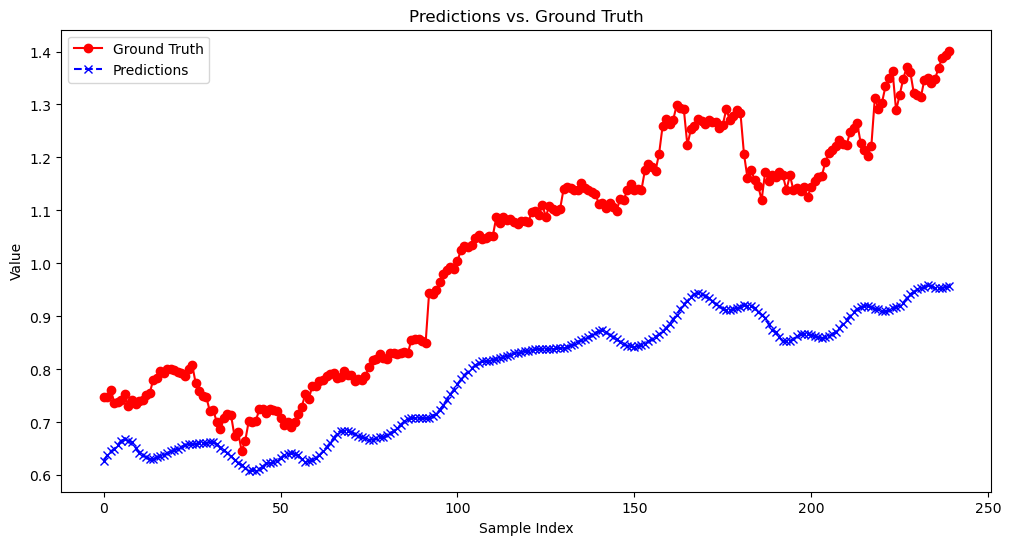

In [22]:
import matplotlib.pyplot as plt
import torch

# Concatenate all batch predictions and ground truths along the batch dimension
pred_array = torch.cat(all_predictions, dim=0).cpu().numpy().flatten()

true_array = torch.cat(all_ground_truths, dim=0).cpu().numpy().flatten()

plt.figure(figsize=(12, 6))
plt.plot(true_array, label='Ground Truth', marker='o', linestyle='-', color='red')
plt.plot(pred_array, label='Predictions', marker='x', linestyle='--', color='blue')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Predictions vs. Ground Truth')
plt.legend()
plt.show()


In [40]:
test_data.head()

,Open,High,Low,Volume,Return,Diff,HL_Diff,MA5,Return_MA5,Close
1002,0.663949,0.661220,0.687245,0.039283,0.420617,0.459027,0.020196,0.667639,0.646452,0.672322
1003,0.663064,0.667159,0.681485,0.083250,0.464773,0.505762,0.075276,0.669998,0.627140,0.680870
1004,0.655725,0.647921,0.657528,0.113456,0.327481,0.361075,0.096083,0.676324,0.642804,0.644088
1005,0.622702,0.627910,0.629905,0.095156,0.338572,0.375160,0.130355,0.674770,0.537710,0.613133
1006,0.597524,0.627910,0.622050,0.091566,0.610016,0.650448,0.167075,0.665120,0.434198,0.643051


Naive baseline MSE: 0.000408138161941781


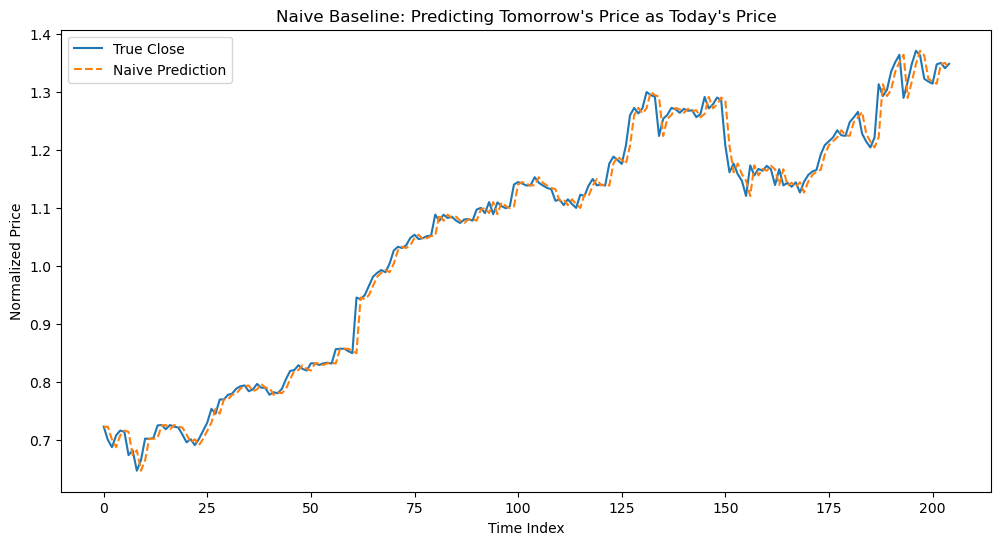

In [66]:
import pandas as pd
import numpy as np

# Create a naive prediction: predict tomorrow's price as today's price.
# That means shift the "Close" column by 1.
test_data['naive_pred'] = test_data['Close'].shift(1)


# Remove the first row which doesn't have a previous day to predict from
test_data = test_data.dropna()

# Compute the Mean Squared Error (MSE)
naive_mse = np.mean((test_data['naive_pred'] - test_data['Close']) ** 2)
print("Naive baseline MSE:", naive_mse)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(test_data['Close'].values, label='True Close')
plt.plot(test_data['naive_pred'].values, label='Naive Prediction', linestyle='--')
plt.title("Naive Baseline: Predicting Tomorrow's Price as Today's Price")
plt.xlabel("Time Index")
plt.ylabel("Normalized Price")
plt.legend()
plt.show()


207
207
Best lag (in sample points): 0


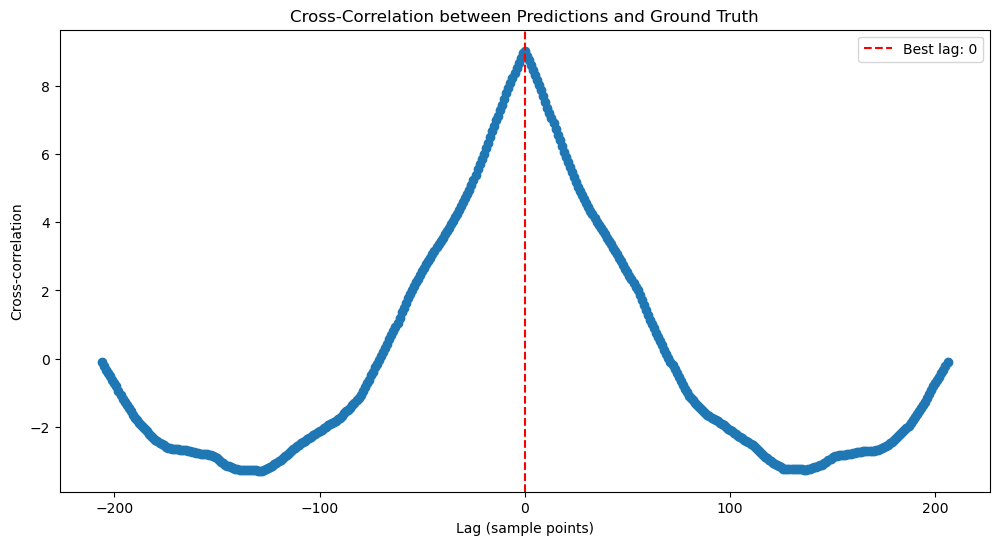

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Assume pred_array and true_array are 1D numpy arrays of your predictions and ground truth
# For example:
# pred_array = np.array([...])
# true_array = np.array([...])

def compute_cross_correlation(preds, actuals):
    """
    Computes the cross-correlation between two 1D arrays.
    
    Args:
      preds: 1D numpy array of predictions.
      actuals: 1D numpy array of ground truth values.
      
    Returns:
      corr: The cross-correlation array.
      lags: The corresponding lags.
    """
    # Subtract means to center the data
    preds_centered = preds - np.mean(preds)
    actuals_centered = actuals - np.mean(actuals)
    
    # Compute full cross-correlation
    corr = np.correlate(preds_centered, actuals_centered, mode='full')
    
    # Create array of lags. For arrays of length N, the lags go from -(N-1) to (N-1).
    lags = np.arange(-len(preds) + 1, len(preds))
    
    return corr, lags

pred_array = test_data['naive_pred'].values
true_array= test_data['Close'].values

print(len(pred_array))
print(len(true_array))

# Compute cross-correlation and lags
corr, lags = compute_cross_correlation(pred_array, true_array)

# Find the lag that gives maximum correlation
max_corr_index = np.argmax(corr)
best_lag = lags[max_corr_index]
print("Best lag (in sample points):", best_lag)

# - If best_lag is positive, the predictions lag behind the actual values.
# - If best_lag is negative, the predictions lead the actual values.

# Plot the cross-correlation function
plt.figure(figsize=(12, 6))
plt.plot(lags, corr, marker='o')
plt.xlabel("Lag (sample points)")
plt.ylabel("Cross-correlation")
plt.title("Cross-Correlation between Predictions and Ground Truth")
plt.axvline(x=best_lag, color='red', linestyle='--', label=f"Best lag: {best_lag}")
plt.legend()
plt.show()


In [69]:
import numpy as np
import torch.nn.functional as F

def compute_shifted_mse(preds, truths, lag):
    # If lag > 0, shift preds forward; if lag < 0, shift preds backward.
    if lag > 0:
        shifted_preds = preds[:-lag]
        aligned_truths = truths[lag:]
    elif lag < 0:
        shifted_preds = preds[-lag:]
        aligned_truths = truths[:lag]
    else:
        shifted_preds = preds
        aligned_truths = truths
    mse = np.mean((shifted_preds - aligned_truths)**2)
    return mse

lags = range(-5, 6)  # try lags from -5 to 5 time steps
mse_values = [compute_shifted_mse(pred_array, true_array, lag) for lag in lags]
best_lag = lags[np.argmin(mse_values)]
print("Best lag (minimizing MSE):", best_lag)


Best lag (minimizing MSE): -3
